In [225]:
# "The Face of a Leader"
# Study 1b: Reverse-correlation rating study on composite images of leader faces
# Evan W. Carr, 05-28-2018 (Columbia Business School)

import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('study1b_data_032017.csv')

rawData.head(20)

,StartDate.StartDate,EndDate.EndDate,Status.ResponseType,IPAddress.IPAddress,Progress.Progress,Duration(inseconds).Duration(inseconds),Finished.Finished,RecordedDate.RecordedDate,ResponseId.ResponseID,RecipientLastName.RecipientLastName,...,unselected_overall.HowTRUSTWORTHYdoesthispersonlook?,selected_overall.HowCOMPETENTdoesthispersonlook?,unselected_overall.HowCOMPETENTdoesthispersonlook?,selected_overall.HowWARMdoesthispersonlook?,unselected_overall.HowWARMdoesthispersonlook?,age,sex,race,data_use,mTurkCode
0,3/12/201712:10:20PM,3/12/201712:12:21PM,0,75.109.214.186,100,120,1,3/12/201712:12:22PM,R_6D3ot62oGiUhc7T,NaN,...,NaN,NaN,NaN,NaN,NaN,28.0,2.0,1.0,4.0,4946534080
1,3/12/201712:14:06PM,3/12/201712:15:59PM,0,24.22.3.83,100,113,1,3/12/201712:16:00PM,R_2veHlrwFprlYPDR,NaN,...,NaN,NaN,NaN,NaN,NaN,27.0,2.0,1.0,4.0,5191403488
2,3/12/201712:17:06PM,3/12/201712:19:01PM,0,24.63.127.35,100,114,1,3/12/201712:19:03PM,R_3KQ5kZXJt7h20Zp,NaN,...,NaN,NaN,NaN,NaN,NaN,43.0,2.0,1.0,4.0,6644172869
3,3/12/201712:19:40PM,3/12/201712:21:38PM,0,99.104.150.42,100,118,1,3/12/201712:21:40PM,R_1rNeCA5owrVvxTc,NaN,...,2.0,NaN,NaN,NaN,NaN,24.0,2.0,1.0,4.0,9366340087
4,3/12/201712:22:28PM,3/12/201712:26:09PM,0,209.94.253.190,100,220,1,3/12/201712:26:10PM,R_10ufJJJF9vlu9Sd,NaN,...,4.0,NaN,NaN,NaN,NaN,25.0,2.0,3.0,4.0,8117997218
5,3/12/201712:26:19PM,3/12/201712:27:35PM,0,108.45.134.123,100,75,1,3/12/201712:27:36PM,R_2E3IEsAHdJfqQZz,NaN,...,NaN,NaN,NaN,NaN,NaN,24.0,1.0,2.0,3.0,7461729604
6,3/12/201712:26:11PM,3/12/201712:27:38PM,0,24.46.112.201,100,87,1,3/12/201712:27:39PM,R_2YS4Qkro4stjriK,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,2.0,2.0,4.0,4426905834
7,3/12/201712:26:12PM,3/12/201712:28:07PM,0,32.213.125.193,100,115,1,3/12/201712:28:08PM,R_2c0LfPFmChOIuGR,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,2.0,1.0,4.0,8718153857
8,3/12/201712:27:25PM,3/12/201712:28:54PM,0,76.187.74.58,100,89,1,3/12/201712:28:56PM,R_1k04oDuiPHDsthA,NaN,...,NaN,NaN,NaN,NaN,NaN,30.0,1.0,3.0,4.0,4960969733
9,3/12/201712:28:02PM,3/12/201712:29:48PM,0,72.177.52.194,100,106,1,3/12/201712:29:49PM,R_aarkQFS9wcjQaHL,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,1.0,1.0,4.0,1242001532


In [226]:
# Create new clean version of the data frame:
cleanData = (pd
             .concat([rawData.loc[:, ['Finished.Finished','ResponseId.ResponseID']], 
                      rawData.loc[:, 'selected_overall.HowMALEorFEMALEdoesthispersonlook?':'data_use']], 
                      axis=1)
             .rename({
                 'Finished.Finished': 'Finished',
                 'ResponseId.ResponseID': 'ResponseId'}, axis=1)
             .query('(Finished == 1) & (data_use >= 3)')
             .drop(['Finished', 'age', 'sex', 'race', 'data_use'], axis=1))

cleanData = (pd
             .melt(cleanData, 
                   id_vars=['ResponseId'], 
                   var_name='TrialType', 
                   value_name='Choice')
             .sort_values(by=['ResponseId', 'TrialType'])
             .dropna())

cleanData.head(20)

,ResponseId,TrialType,Choice
9819,R_0DSMmOSXaDP0smZ,selected_overall.HowWARMdoesthispersonlook?,5.0
10398,R_0DSMmOSXaDP0smZ,unselected_overall.HowWARMdoesthispersonlook?,4.0
4742,R_0lcEbFxDEeRe5aN,selected_overall.HowATTRACTIVEdoesthispersonlook?,4.0
5321,R_0lcEbFxDEeRe5aN,unselected_overall.HowATTRACTIVEdoesthisperson...,2.0
7487,R_0pU6k5blBj9nd7P,selected_overall.HowTRUSTWORTHYdoesthispersonl...,3.0
8066,R_0pU6k5blBj9nd7P,unselected_overall.HowTRUSTWORTHYdoesthisperso...,1.0
7320,R_0xFGRPP2gCWQUOl,selected_overall.HowTRUSTWORTHYdoesthispersonl...,3.0
7899,R_0xFGRPP2gCWQUOl,unselected_overall.HowTRUSTWORTHYdoesthisperso...,1.0
9702,R_10GzNk8FcTevmkj,selected_overall.HowWARMdoesthispersonlook?,4.0
10281,R_10GzNk8FcTevmkj,unselected_overall.HowWARMdoesthispersonlook?,1.0


In [227]:
# Split TrialType attribute into our actual factors and rating dimensions:
cleanData[['Stimulus', 'Dimension']] = cleanData['TrialType'].str.split('_', expand=True)
cleanData['Stimulus'] = cleanData['Stimulus'].str.capitalize()

dimDict = {
    'overall.HowWARMdoesthispersonlook?': 'Warmth',
    'overall.HowATTRACTIVEdoesthispersonlook?': 'Attractiveness',
    'overall.HowTRUSTWORTHYdoesthispersonlook?': 'Trust',
    'overall.HowCOMPETENTdoesthispersonlook?': 'Competence',
    'overall.HowMALEorFEMALEdoesthispersonlook?': 'Gender',
    'overall.HowmuchofaWHITEAMERICANorAFRICANAMERICANdoesthispersonlooklike?': 'Race',
    'overall.HowHAPPYdoesthispersonlook?': 'Happiness',
    'overall.HowLIKABLEdoesthispersonlook?': 'Likability',
    'overall.HowDOMINANTdoesthispersonlook?': 'Dominance'
}

indexDict = {
    'Attractiveness': 'Positivity',
    'Competence': 'Ability',
    'Dominance': 'Ability',
    'Happiness': 'Positivity',
    'Likability': 'Positivity',
    'Gender': 'Gender',
    'Race': 'Race',
    'Trust': 'Positivity',
    'Warmth': 'Positivity'
}

cleanData['Dimension'] = cleanData['Dimension'].map(dimDict)
cleanData['Index'] = cleanData['Dimension'].map(indexDict)

cleanData_long = cleanData.drop(['TrialType'], axis=1)

cleanData_long.head(20)

,ResponseId,Choice,Stimulus,Dimension,Index
9819,R_0DSMmOSXaDP0smZ,5.0,Selected,Warmth,Positivity
10398,R_0DSMmOSXaDP0smZ,4.0,Unselected,Warmth,Positivity
4742,R_0lcEbFxDEeRe5aN,4.0,Selected,Attractiveness,Positivity
5321,R_0lcEbFxDEeRe5aN,2.0,Unselected,Attractiveness,Positivity
7487,R_0pU6k5blBj9nd7P,3.0,Selected,Trust,Positivity
8066,R_0pU6k5blBj9nd7P,1.0,Unselected,Trust,Positivity
7320,R_0xFGRPP2gCWQUOl,3.0,Selected,Trust,Positivity
7899,R_0xFGRPP2gCWQUOl,1.0,Unselected,Trust,Positivity
9702,R_10GzNk8FcTevmkj,4.0,Selected,Warmth,Positivity
10281,R_10GzNk8FcTevmkj,1.0,Unselected,Warmth,Positivity


In [228]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawData
                .rename({
                    'Finished.Finished': 'Finished',
                    'ResponseId.ResponseID': 'ResponseId'}, axis=1)
                .query('(Finished == 1) & (data_use >= 3)')
                .groupby('ResponseId')
                .agg({'age': np.mean, 'sex': pd.Series.unique, 'race': pd.Series.unique})
                .reset_index())

demogSummary['age'].mean()

35.5440414507772

In [229]:
demogSummary['age'].std()

12.327258101010793

In [230]:
# 1 = male, 2 = female
demogSummary['sex'].value_counts()

2.0    353
1.0    226
Name: sex, dtype: int64

In [231]:
# 1 = White-American, 2 = African-American, 3 = Hispanic, 4 = Asian-American, 5 = other
demogSummary['race'].value_counts()

1.0    431
2.0     53
4.0     45
3.0     38
5.0     12
Name: race, dtype: int64

In [232]:
# Convert dataframe to wide format to calculate subject-level difference scores:
cleanData_wide = (cleanData_long
                  .set_index(['ResponseId', 'Stimulus', 'Dimension', 'Index'])
                  .unstack('Stimulus')
                  .reset_index())

def flatten_cols(df):
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    return df

cleanData_wide = flatten_cols(cleanData_wide)

cleanData_wide['Choice_meandiff'] = cleanData_wide['Choice_Selected'] - cleanData_wide['Choice_Unselected']

cleanData_wide.head(20)

,ResponseId,Dimension,Index,Choice_Selected,Choice_Unselected,Choice_meandiff
0,R_0DSMmOSXaDP0smZ,Warmth,Positivity,5.0,4.0,1.0
1,R_0lcEbFxDEeRe5aN,Attractiveness,Positivity,4.0,2.0,2.0
2,R_0pU6k5blBj9nd7P,Trust,Positivity,3.0,1.0,2.0
3,R_0xFGRPP2gCWQUOl,Trust,Positivity,3.0,1.0,2.0
4,R_10GzNk8FcTevmkj,Warmth,Positivity,4.0,1.0,3.0
5,R_10TPXuDuuFa5pFW,Competence,Ability,5.0,4.0,1.0
6,R_10YFYgyItyoJ03e,Competence,Ability,4.0,2.0,2.0
7,R_10ufJJJF9vlu9Sd,Trust,Positivity,3.0,4.0,-1.0
8,R_10vgQJ14oBYLJ4c,Gender,Gender,1.0,4.0,-3.0
9,R_111oHHSdht9lqUh,Race,Race,2.0,4.0,-2.0


In [233]:
# Create summary dataframe for each Dimension, with means, SDs, and SEMs:
dimSummary = flatten_cols(cleanData_wide
                          .groupby(['Dimension'])
                          .agg({'Choice_meandiff': [np.mean, np.std, 'count']})
                          .reset_index())

# Need to reverse-code ratings for gender and race dimensions:
dimSummary.loc[dimSummary['Dimension']=='Gender', 'Choice_meandiff_mean'] = -1 * \
    dimSummary.loc[dimSummary['Dimension']=='Gender', 'Choice_meandiff_mean']
dimSummary.loc[dimSummary['Dimension']=='Race', 'Choice_meandiff_mean'] = -1 * \
    dimSummary.loc[dimSummary['Dimension']=='Race', 'Choice_meandiff_mean']

dimSummary['Choice_sem'] = dimSummary['Choice_meandiff_std'] / np.sqrt(dimSummary['Choice_meandiff_count'])
dimSummary['Choice_sem_lower'] = dimSummary['Choice_meandiff_mean'] - dimSummary['Choice_sem']
dimSummary['Choice_sem_upper'] = dimSummary['Choice_meandiff_mean'] + dimSummary['Choice_sem']

dimSummary

,Dimension,Choice_meandiff_mean,Choice_meandiff_std,Choice_meandiff_count,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,Attractiveness,1.762712,1.277646,59,0.166335,1.596377,1.929047
1,Competence,1.607143,1.485427,56,0.198499,1.408644,1.805641
2,Dominance,1.339623,1.492847,53,0.205058,1.134564,1.544681
3,Gender,2.402439,1.265494,82,0.139750,2.262689,2.542189
4,Happiness,2.125000,1.076443,64,0.134555,1.990445,2.259555
5,Likability,1.518519,1.598829,54,0.217573,1.300945,1.736092
6,Race,1.191176,1.585921,68,0.192321,0.998855,1.383498
7,Trust,1.128571,1.403117,70,0.167705,0.960867,1.296276
8,Warmth,1.876712,1.802353,73,0.210950,1.665763,2.087662


In [234]:
# Do the same thing for Index:
indexSummary = flatten_cols(cleanData_wide
                            .groupby(['Index'])
                            .agg({'Choice_meandiff': [np.mean, np.std, 'count']})
                            .reset_index())

# Need to reverse-code ratings for gender and race dimensions:
indexSummary.loc[indexSummary['Index']=='Gender', 'Choice_meandiff_mean'] = -1 * \
    indexSummary.loc[indexSummary['Index']=='Gender', 'Choice_meandiff_mean']
indexSummary.loc[indexSummary['Index']=='Race', 'Choice_meandiff_mean'] = -1 * \
    indexSummary.loc[indexSummary['Index']=='Race', 'Choice_meandiff_mean']

indexSummary['Choice_sem'] = indexSummary['Choice_meandiff_std'] / np.sqrt(indexSummary['Choice_meandiff_count'])
indexSummary['Choice_sem_lower'] = indexSummary['Choice_meandiff_mean'] - indexSummary['Choice_sem']
indexSummary['Choice_sem_upper'] = indexSummary['Choice_meandiff_mean'] + indexSummary['Choice_sem']

indexSummary

,Index,Choice_meandiff_mean,Choice_meandiff_std,Choice_meandiff_count,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,Ability,1.477064,1.488203,109,0.142544,1.334520,1.619608
1,Gender,2.402439,1.265494,82,0.139750,2.262689,2.542189
2,Positivity,1.681250,1.493442,320,0.083486,1.597764,1.764736
3,Race,1.191176,1.585921,68,0.192321,0.998855,1.383498


In [235]:
# Are the difference scores significant?
# Run t-tests against zero for each Dimension & Index ...
# (All dimensions look very significant)

stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Attractiveness', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=10.597340052263842, pvalue=3.4595932681765501e-15)

In [236]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Competence', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=8.09649718257395, pvalue=6.0736276961481189e-11)

In [237]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Dominance', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=6.5328865225993731, pvalue=2.7484783902025984e-08)

In [238]:
# NOTE: The signs for stats here need to be reversed (see above) ...
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Gender', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=-17.190921452592569, pvalue=9.3626222174293528e-29)

In [239]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Happiness', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=15.792750200775975, pvalue=1.390368063900523e-23)

In [240]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Likability', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=6.9793493722497848, pvalue=4.8688996579497424e-09)

In [241]:
# NOTE: The signs for stats here need to be reversed (see above) ...
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Race', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=-6.1936842354742039, pvalue=4.0730110317503203e-08)

In [242]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Trust', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=6.7295219335240031, pvalue=4.0977888397369776e-09)

In [243]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Dimension']=='Warmth', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=8.8964998717682757, pvalue=3.2551607035370142e-13)

In [244]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Index']=='Positivity', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=20.138123078489834, pvalue=8.8908616376972835e-59)

In [245]:
stats.ttest_1samp(a=cleanData_wide.loc[cleanData_wide['Index']=='Ability', 'Choice_meandiff'], 
                  popmean=0)

Ttest_1sampResult(statistic=10.362166828457823, pvalue=6.9803134716239569e-18)

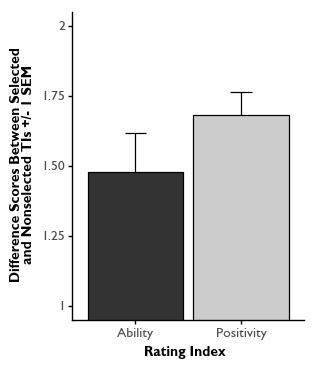

<ggplot: (188273125878)>

In [246]:
# Use plotnine package to plot summary data for each Index, using ggplot2 (R) style ...
(ggplot(indexSummary.loc[(indexSummary['Index']=='Ability') | (indexSummary['Index']=='Positivity'), :], 
        aes(x='Index', y='Choice_meandiff_mean', fill='Index')) 
 + geom_errorbar(aes(ymax='Choice_sem_upper', ymin='Choice_sem_lower'), 
                 position=position_dodge(width=0.9), 
                 width=0.2, 
                 color='black') 
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=1, color='black')
 + theme_classic() 
 + scale_fill_grey(guide=False)
 + coord_cartesian(ylim = [1, 2])
 + labs(x='Rating Index', y='Difference Scores Between Selected\nand Nonselected TIs +/- 1 SEM')
 + theme(figure_size = (3,4),
         text = element_text('Gill Sans MT'),
         axis_text_x = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black')))

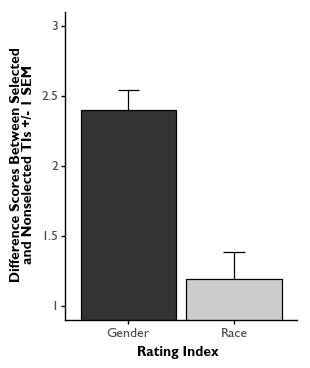

<ggplot: (188275616204)>

In [247]:
(ggplot(indexSummary.loc[(indexSummary['Index']=='Gender') | (indexSummary['Index']=='Race'), :], 
        aes(x='Index', y='Choice_meandiff_mean', fill='Index')) 
 + geom_errorbar(aes(ymax='Choice_sem_upper', ymin='Choice_sem_lower'), 
                 position=position_dodge(width=0.9), 
                 width=0.2, 
                 color='black') 
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=1, color='black')
 + theme_classic() 
 + scale_fill_grey(guide=False)
 + coord_cartesian(ylim = [1, 3])
 + labs(x='Rating Index', y='Difference Scores Between Selected\nand Nonselected TIs +/- 1 SEM')
 + theme(figure_size = (3,4),
         text = element_text('Gill Sans MT'),
         axis_text_x = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black')))

In [248]:
# Create rating plot & summary data for each Dimension, along with their difference scores ...
plotSummary = flatten_cols(cleanData_long
                          .groupby(['Dimension', 'Stimulus'])
                          .agg({'Choice': [np.mean, np.std, 'count']})
                          .reset_index())

# Need to reverse-code ratings for gender and race dimensions:
plotSummary.loc[plotSummary['Dimension']=='Gender', 'Choice_mean'] = 7 - \
    plotSummary.loc[plotSummary['Dimension']=='Gender', 'Choice_mean']
plotSummary.loc[plotSummary['Dimension']=='Race', 'Choice_mean'] = 7 - \
    plotSummary.loc[plotSummary['Dimension']=='Race', 'Choice_mean']

plotSummary['Choice_sem'] = plotSummary['Choice_std'] / np.sqrt(plotSummary['Choice_count'])
plotSummary['Choice_sem_lower'] = plotSummary['Choice_mean'] - plotSummary['Choice_sem']
plotSummary['Choice_sem_upper'] = plotSummary['Choice_mean'] + plotSummary['Choice_sem']

plotSummary

,Dimension,Stimulus,Choice_mean,Choice_std,Choice_count,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,Attractiveness,Selected,3.593220,1.190749,59,0.155022,3.438198,3.748243
1,Attractiveness,Unselected,1.830508,0.912604,59,0.118811,1.711698,1.949319
2,Competence,Selected,4.428571,1.291330,56,0.172561,4.256010,4.601133
3,Competence,Unselected,2.821429,1.222622,56,0.163380,2.658049,2.984808
4,Dominance,Selected,4.452830,0.773753,53,0.106283,4.346547,4.559113
5,Dominance,Unselected,3.113208,1.154596,53,0.158596,2.954612,3.271803
6,Gender,Selected,5.658537,0.592536,82,0.065435,5.593102,5.723971
7,Gender,Unselected,3.256098,1.109009,82,0.122470,3.133628,3.378567
8,Happiness,Selected,4.390625,0.789156,64,0.098645,4.291980,4.489270
9,Happiness,Unselected,2.265625,0.840298,64,0.105037,2.160588,2.370662


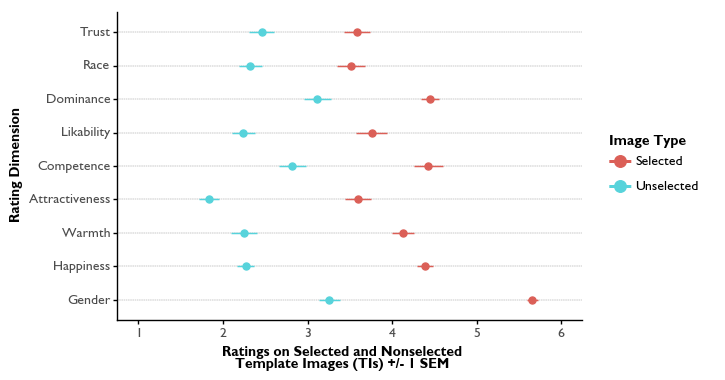

<ggplot: (-9223371848581845970)>

In [249]:
# Reorder Dimension categories by magnitude of difference between selected/unselected:
plotSummary['Dimension'] = plotSummary['Dimension'].astype('category')
plotCats = dimSummary.sort_values(by='Choice_meandiff_mean', ascending=False)['Dimension']
plotSummary['Dimension'] = plotSummary['Dimension'].cat.reorder_categories(plotCats)

(ggplot(plotSummary, aes(x='Dimension', y='Choice_mean', color='Stimulus')) 
 + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=.6) 
 + theme_classic() 
 + coord_flip() 
 + scale_y_continuous(breaks=[1,2,3,4,5,6], limits=[1,6]) 
 + labs(color='Image Type', x='Rating Dimension', y='Ratings on Selected and Nonselected\nTemplate Images (TIs) +/- 1 SEM') 
 + theme(figure_size = (6,4),
         text = element_text('Gill Sans MT'),
         axis_text_x  = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'right',
         legend_title = element_text(weight='bold', size=10),
         legend_text = element_text(size=10),
         panel_grid_major_y = element_line(color='gray', size=0.3, linetype='dashed')))

C:\Users\carr3\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


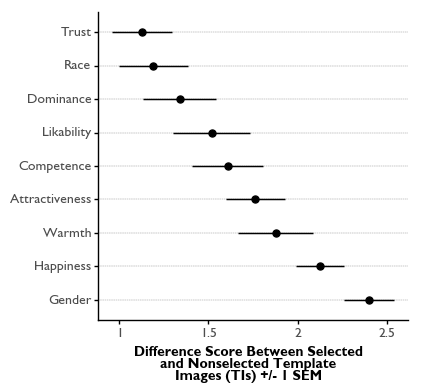

<ggplot: (-9223371848581941153)>

In [250]:
# Plot the difference scores by dimension ...
dimSummary['Dimension'] = dimSummary['Dimension'].astype('category').cat.reorder_categories(plotCats)

(ggplot(dimSummary, aes(x='Dimension', y='Choice_meandiff_mean')) 
 + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=.6) 
 + scale_color_manual(values='black') 
 + theme_classic() 
 + labs(x='', y='Difference Score Between Selected\nand Nonselected Template\nImages (TIs) +/- 1 SEM')
 + coord_flip() 
 + theme(figure_size = (4,4),
         text = element_text('Gill Sans MT'),
         axis_text_x  = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         panel_grid_major_y = element_line(color='gray', size=0.3, linetype='dashed')))